In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 讀取資料
data = pd.read_csv(r"C:\Users\danie\OneDrive\Desktop\summer lesson\homework\homework\dataset.csv")
X = data[['Runtime']]
y = data['faults']

# 分割訓練與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# 線性回歸
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_linear = model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("線性回歸：")
print("斜率（權重）w:", model.coef_)
print("截距 b:", model.intercept_)
print(f'MSE: {mse_linear}')
print(f'R2: {r2_linear}\n')

線性回歸：
斜率（權重）w: [0.71788888]
截距 b: -157.52002738479882
MSE: 949888.2814132371
R2: 0.6486418500386513



In [12]:
# 非線性回歸（多項式回歸）
degree = 5
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)
y_pred_poly = polyreg.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("非線性回歸（多項式）:")
print(f'MSE: {mse_poly}')
print(f'R2: {r2_poly}')


非線性回歸（多項式）:
MSE: 113799.88761404683
R2: 0.9579060835255361


c:\Users\danie\.pyenv\pyenv-win\versions\3.12.0\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


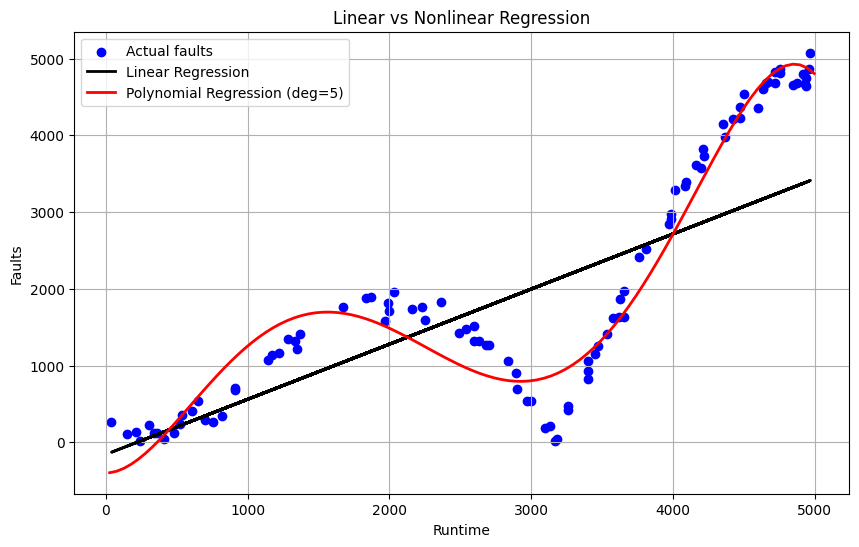

In [13]:
# 視覺化：同圖顯示
plt.figure(figsize=(10, 6))

# 畫出實際觀測點
plt.scatter(X_test, y_test, color='blue', label='Actual faults')

# 線性回歸曲線
plt.plot(X_test, y_pred_linear, color='black', linewidth=2, label='Linear Regression')

# 非線性回歸曲線（用平滑的 X 值）
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_fit_poly = polyreg.predict(X_fit)
plt.plot(X_fit, y_fit_poly, color='red', linewidth=2, label='Polynomial Regression (deg=5)')

# 圖表標題與標籤
plt.title('Linear vs Nonlinear Regression')
plt.xlabel('Runtime')
plt.ylabel('Faults')
plt.legend()
plt.grid(True)
plt.show()